# Name: Thomas Buchegger

In [1]:
%matplotlib inline
import torch
import torchvision
from torchvision.transforms import Compose, ToTensor, Normalize

import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
from IPython.display import clear_output

# Define which device to use for computations
# If you have gpu, use 'cuda'
# device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')

# Assignment 1 ATML 2021

## Task 1. Prepare data for training and model selection

PyTorch torchvision module provides you with some predesigned datasets. Like the MNIST dataset, that we are going to use (https://pytorch.org/vision/0.8/_modules/torchvision/datasets/mnist.html#MNIST). Let us build a simple MNIST dataset and visualise some samples.

In [4]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz

--2021-03-29 12:27:58--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-29 12:27:59--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [           <=>      ]  33.20M  6.56MB/s    in 5.6s    

2021-03-29 12:28:05 (5.97 MB/s) - ‘MNIST.tar.gz’ saved [34813078]



In [5]:
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [6]:
from torchvision.datasets import MNIST
# Create MNIST dataset
root_dir = './'
torchvision.datasets.MNIST(root=root_dir,train=True,download=True)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [7]:
dataset = torchvision.datasets.MNIST(root=root_dir, train=True, download=True)


In [8]:
print(len(dataset))

60000


5


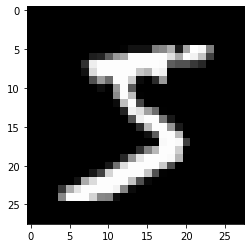

In [9]:
# Show elements of dataset
image, label = dataset[0]
plt.figure()
plt.imshow(image, cmap='gray')
print(label)

For the needs of this assignment you will have to implement a similar Dataset class which will yield an image pair and a label equal to the mode 10 sum of the labels in the pair. 

### MnistPairs dataset

Implement the __getitem__ method in the dataset.py file. Build training and test sets with the 'right' and 'left' orders of the digits. Split the both training sets into training and validation sets with 90% and 10% of the data respectively. Concatenate the validation sets into one with both 'right' and 'test' orders. The same should be done with the test sets. Visualise some samples from the constructed datasets.

In [10]:
from tati import MnistPairs

In [11]:

transforms = Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])
# unstransformed datasets for display
dsLeft = MnistPairs(root_dir, train=True, download=True, order='left')
dsLeftOrig = MnistPairs(root_dir, train=True, download=True, order='left', return_original_labels=True)
dsLeftConcat = MnistPairs(root_dir, train=True, download=True, transform=transforms, order='left', concat=True)
dsLeftConcatOrig = MnistPairs(root_dir, train=True, download=True, transform=transforms, order='left', return_original_labels=True, concat=True)

dsRight = MnistPairs(root_dir, train=True, download=True)
dsRightOrig = MnistPairs(root_dir, train=True, download=True, return_original_labels=True)
dsRightConcat = MnistPairs(root_dir, train=True, download=True, transform=transforms, concat=True)
dsRightConcatOrig = MnistPairs(root_dir, train=True, download=True, transform=transforms, return_original_labels=True, concat=True)

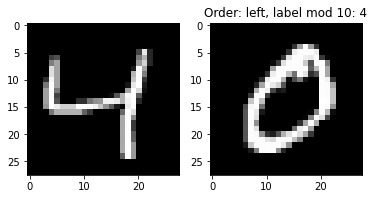

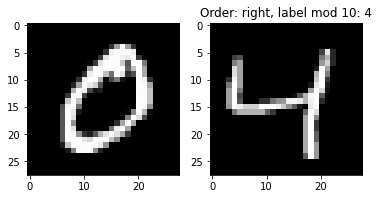

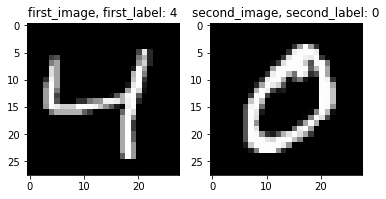

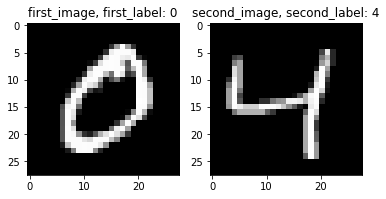

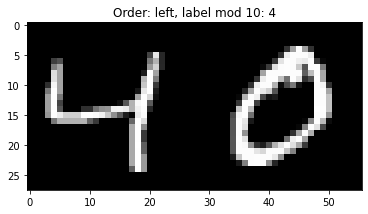

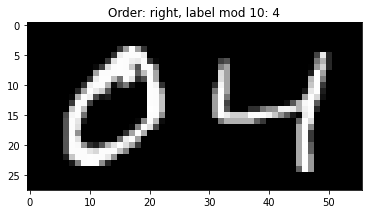

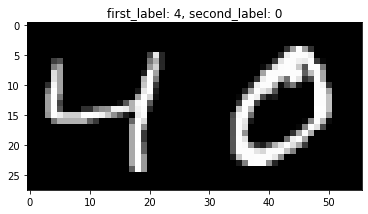

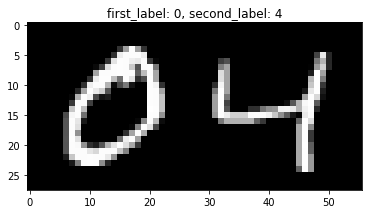

In [12]:
dsLeftEntry = dsLeft[1]
plt.subplot(1,2,1), plt.imshow(dsLeftEntry[0], cmap='gray')
plt.subplot(1,2,2), plt.imshow(dsLeftEntry[1], cmap='gray')
plt.title("Order: left, label mod 10: {}".format(dsLeftEntry[2]))
plt.show()

dsRightEntry = dsRight[1]
plt.subplot(1,2,1), plt.imshow(dsRightEntry[0], cmap='gray')
plt.subplot(1,2,2), plt.imshow(dsRightEntry[1], cmap='gray')
plt.title("Order: right, label mod 10: {}".format(dsRightEntry[2]))
plt.show()

dsLeftOrigEntry = dsLeftOrig[1]
plt.subplot(1,2,1), plt.imshow(dsLeftOrigEntry[0], cmap='gray')
plt.title("first_image, first_label: {}".format(dsLeftOrigEntry[3]))
plt.subplot(1,2,2), plt.imshow(dsLeftOrigEntry[1], cmap='gray')
plt.title("second_image, second_label: {}".format(dsLeftOrigEntry[4]))
plt.show()

dsRightOrigEntry = dsRightOrig[1]
plt.subplot(1,2,1), plt.imshow(dsRightOrigEntry[0], cmap='gray')
plt.title("first_image, first_label: {}".format(dsRightOrigEntry[3]))
plt.subplot(1,2,2), plt.imshow(dsRightOrigEntry[1], cmap='gray')
plt.title("second_image, second_label: {}".format(dsRightOrigEntry[4]))
plt.show()

dsLeftConcatEntry = dsLeftConcat[1]
plt.imshow(np.squeeze(dsLeftConcatEntry[0]), cmap='gray')
plt.title("Order: left, label mod 10: {}".format(dsLeftConcatEntry[1]))
plt.show()

dsRightConcatEntry = dsRightConcat[1]
plt.imshow(np.squeeze(dsRightConcatEntry[0]), cmap='gray')
plt.title("Order: right, label mod 10: {}".format(dsRightConcatEntry[1]))
plt.show()

dsLeftConcatOrigEntry = dsLeftConcatOrig[1]
plt.imshow(np.squeeze(dsLeftConcatOrigEntry[0]), cmap='gray')
plt.title("first_label: {}, second_label: {}".format(dsLeftConcatOrigEntry[2], dsLeftConcatOrigEntry[3]))
plt.show()

dsRightConcatOrigEntry = dsRightConcatOrig[1]
plt.imshow(np.squeeze(dsRightConcatOrigEntry[0]), cmap='gray')
plt.title("first_label: {}, second_label: {}".format(dsRightConcatOrigEntry[2], dsRightConcatOrigEntry[3]))
plt.show()


In [13]:
# # transformed datasets
# transforms = Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])

# dsLeftConcatOrig = MnistPairs(root_dir, train=True, download=True, order='left', return_original_labels=True, concat=True)
# dsRightConcatOrig = MnistPairs(root_dir, train=True, download=True, return_original_labels=True, concat=True)

# dsLeftTest = MnistPairs(root_dir, train=False, download=True, order='left', return_original_labels=True, concat=True)
# dsRightTest = MnistPairs(root_dir, train=False, download=True, return_original_labels=True, concat=True)

In [14]:
from torch.utils import data

In [15]:
dsLeftTest = MnistPairs(root_dir, train=False, download=True, transform=transforms, order='left', return_original_labels=True, concat=True)
dsRightTest = MnistPairs(root_dir, train=False, download=True, transform=transforms, return_original_labels=True, concat=True)

lTrainLen = int(0.9 * len(dsLeftConcatOrig))
rTrainLen = int(0.9 * len(dsRightConcatOrig))
lValLen = len(dsLeftConcatOrig) - lTrainLen
rValLen = len(dsRightConcatOrig) - rTrainLen

dsLeftTrain, dsLeftVal = data.random_split(dsLeftConcatOrig, [lTrainLen, lValLen])
dsRightTrain, dsRightVal = data.random_split(dsRightConcatOrig, [rTrainLen, rValLen])

datasetsVal = [dsLeftVal, dsRightVal]
datasetsTrain = [dsLeftTrain, dsRightTrain]
datasetsTest = [dsLeftTest, dsRightTest]

concatVal = data.ConcatDataset(datasetsVal)
concatTrain = data.ConcatDataset(datasetsTrain)
concatTest = data.ConcatDataset(datasetsTest)

### Label and Pair Distribution

Visualize the distribution of the labels and pairs in the training, validation and testing sets.

Distribution of the concatenated training set:


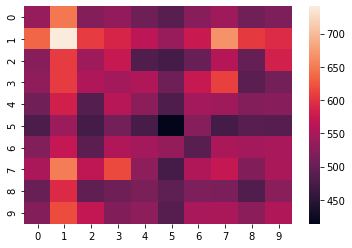


Distribution of the concatenated validation set:


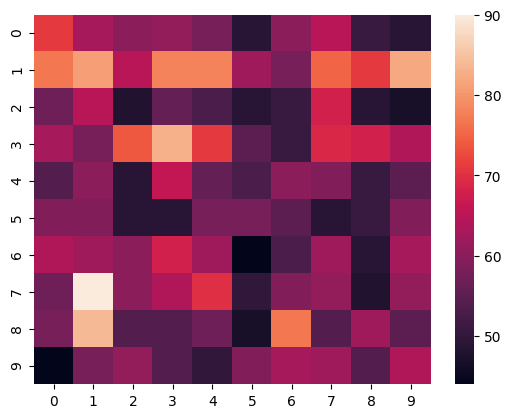


Distribution of the concatenated test set:


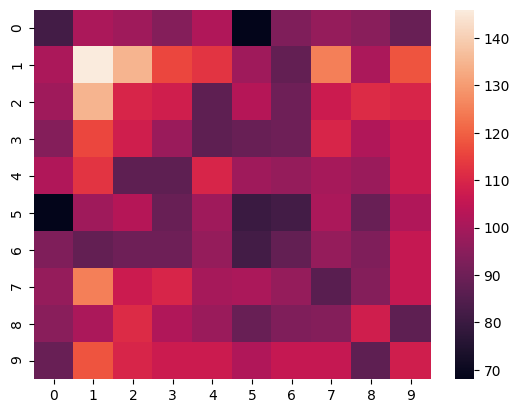

In [16]:
import seaborn as sns;

def calculate_distribution_of_labels(dataset):
    pairs = np.zeros((10,10))
    for entry in dataset:
        pairs[entry[2], entry[3]] += 1
    
    sns.heatmap(pairs)
    plt.show()
    plt.rcdefaults()

print("Distribution of the concatenated training set:")
calculate_distribution_of_labels(concatTrain)
print("")

print("Distribution of the concatenated validation set:")
calculate_distribution_of_labels(concatVal)
print("")

print("Distribution of the concatenated test set:")
calculate_distribution_of_labels(concatTest)

If the distribution of the labels in the test set differs from the one in the training set, we should expect a different performance of the model on the test set.

## Task 2. Design training settings

Having the MnistPairs dataset implemented, we can now nicely wrap in with a DataLoader class for the ease of training.

In [17]:
import torch.nn as nn
from torch.utils.data import DataLoader  

In [18]:
trainLeft_loader = DataLoader(dsLeftTrain, batch_size=128, shuffle=True)
valLeft_loader = DataLoader(dsLeftVal, batch_size=128, shuffle=False)
testLeft_loader = DataLoader(dsLeftTest, batch_size=128, shuffle=False)

trainRight_loader = DataLoader(dsRightTrain, batch_size=128, shuffle=True)
valRight_loader = DataLoader(dsRightVal, batch_size=128, shuffle=False)
testRight_loader = DataLoader(dsRightTest, batch_size=128, shuffle=False)

train_loader = DataLoader(concatTrain, batch_size=128, shuffle=True)
val_loader = DataLoader(concatVal, batch_size=128, shuffle=False)
test_loader = DataLoader(concatTest, batch_size=128, shuffle=False)

Define a bunch of models to test, the loss function and the optimizers.

In [19]:
# Hyperparameters
input_size = 56*28
hidden_sizes = [128, 64]
output_size = 10
loss_fn = nn.CrossEntropyLoss()

In [20]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.main = nn.Sequential(nn.Sigmoid(),
                                  nn.Linear(56*28, 256),
                                  nn.ReLU(),
                                  nn.Linear(256, 128),
                                  nn.LogSoftmax(dim=1))

    def forward(self, x):
        out = x.view(x.size(0), 56*28)
        out = self.main(out)
        return out

In [21]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.main = nn.Sequential(nn.ReLU(),
                                  nn.Linear(56*28, 256),
                                  nn.ReLU(),
                                  nn.Linear(256, 128),
                                  nn.LogSoftmax(dim=1))

    def forward(self, x):
        out = x.view(x.size(0), 56*28)
        out = self.main(out)
        return out

In [22]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.main = nn.Sequential(nn.Sigmoid(),
                                  nn.Linear(56*28, 256),
                                  nn.Sigmoid(),
                                  nn.Linear(256, 128),
                                  nn.LogSoftmax(dim=1))

    def forward(self, x):
        out = x.view(x.size(0), 56*28)
        out = self.main(out)
        return out

Let us also define the metric we are going to use for the assesment of the model. We will simply use the accuracy of the model.

In [23]:
def accuracy(labels, predictions):
    # Return the accuracy of predictions, i.e. the part of cases
    # where the corresponding prediction matches the label.

    _, preds = torch.max(predictions, dim=1)
    acc = 100 * torch.tensor(torch.sum(preds == labels).item() / len(preds))
    return acc

Write the training loop.

In [24]:
def train_epoch(model, dataloader, optimizer, loss_fn):
    trainLosses = []
    correct_predictions = 0

    for iteration, (images, labels, _, _) in enumerate(tqdm(dataloader)):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        # Log metrics
        trainLosses.append(loss.item())
        predicted_labels = output.argmax(dim=1)
        correct_predictions += (predicted_labels == labels).sum().item()
    accuracy = 100.0 * correct_predictions / len(dataloader.dataset)
    # Return loss values for each iteration and accuracy
    mean_loss = np.array(trainLosses).mean()
    return mean_loss, accuracy

Write the evaluation code.

In [25]:
def evaluate_model(model, dataset_loader, loss_fn):
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for iteration, (images, labels, _, _) in enumerate(tqdm(dataset_loader)):
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            loss = loss_fn(output, labels)
            predicted_labels = output.argmax(dim=1)
            correct_predictions += (predicted_labels == labels).sum().item()
            losses.append(loss.item())
    mean_loss = np.array(losses).mean()
    accuracy = 100.0 * correct_predictions / len(dataset_loader.dataset)
    # Return mean loss and accuracy
    return mean_loss, accuracy

## Task 3. Train on training 'right' set.

Train the models on training 'right' set and select the best model on the validation set.

In [26]:
def train(model, train_dataloader, val_dataloader, optimizer, n_epochs, loss_function):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, loss_fn)
        model.eval()
        val_loss, val_accuracy = evaluate_model(model, val_dataloader, loss_fn)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        print('Epoch {}/{}: train_loss: {:.4f}, train_accuracy: {:.4f}, val_loss: {:.4f}, val_accuracy: {:.4f}'.format(epoch+1, n_epochs,
                                                                                                      train_losses[-1],
                                                                                                      train_accuracies[-1],
                                                                                                      val_losses[-1],
                                                                                                      val_accuracies[-1]))
    return train_losses, val_losses, train_accuracies, val_accuracies

In [27]:
def plot(n_epochs, train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure()
    plt.plot(np.arange(n_epochs), train_losses)
    plt.plot(np.arange(n_epochs), val_losses)
    plt.legend(['train_loss', 'val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss value')
    plt.title('Train/val loss');

    plt.figure()
    plt.plot(np.arange(n_epochs), train_accuracies)
    plt.plot(np.arange(n_epochs), val_accuracies)
    plt.legend(['train_acc', 'val_acc'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Train/val accuracy');

In [45]:
# Initialize loss function, optimizer and parameters
model = Model1()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 50

train_losses, val_losses, train_acc, val_acc = train(model, trainRight_loader, valRight_loader, optimizer, n_epochs, loss_fn)


Epoch 1/50: train_loss: 2.4501, train_accuracy: 9.9037, val_loss: 2.3240, val_accuracy: 10.4000



Epoch 2/50: train_loss: 2.3346, train_accuracy: 10.3296, val_loss: 2.3325, val_accuracy: 10.1667



Epoch 3/50: train_loss: 2.3289, train_accuracy: 9.8222, val_loss: 2.3252, val_accuracy: 9.8333



Epoch 4/50: train_loss: 2.3203, train_accuracy: 10.4815, val_loss: 2.3282, val_accuracy: 9.7333



Epoch 5/50: train_loss: 2.3132, train_accuracy: 10.8852, val_loss: 2.3169, val_accuracy: 9.4000



Epoch 6/50: train_loss: 2.3073, train_accuracy: 11.4481, val_loss: 2.2997, val_accuracy: 12.2000



Epoch 7/50: train_loss: 2.3001, train_accuracy: 12.1852, val_loss: 2.3021, val_accuracy: 12.2000



Epoch 8/50: train_loss: 2.2900, train_accuracy: 12.9519, val_loss: 2.3000, val_accuracy: 10.3000



Epoch 9/50: train_loss: 2.2737, train_accuracy: 14.4000, val_loss: 2.2725, val_accuracy: 17.5667



Epoch 10/50: train_loss: 2.2484, train_accuracy: 17.5111, val_loss: 2.2436, val_accuracy: 14.7333



Epoch 11/50: train_loss: 2.2140, train_accuracy: 19.9333, val_loss: 2.1914, val_accuracy: 24.3000



Epoch 12/50: train_loss: 2.1683, train_accuracy: 22.6630, val_loss: 2.1536, val_accuracy: 22.3000



Epoch 13/50: train_loss: 2.1116, train_accuracy: 25.7000, val_loss: 2.0956, val_accuracy: 27.9667



Epoch 14/50: train_loss: 2.0520, train_accuracy: 28.1444, val_loss: 2.0256, val_accuracy: 28.7000



Epoch 15/50: train_loss: 1.9963, train_accuracy: 30.0148, val_loss: 2.0003, val_accuracy: 27.6000



Epoch 16/50: train_loss: 1.9387, train_accuracy: 32.7333, val_loss: 1.9190, val_accuracy: 34.9000



Epoch 17/50: train_loss: 1.8822, train_accuracy: 35.0815, val_loss: 1.8675, val_accuracy: 36.3667



Epoch 18/50: train_loss: 1.8275, train_accuracy: 37.5222, val_loss: 1.8245, val_accuracy: 36.7333



Epoch 19/50: train_loss: 1.7806, train_accuracy: 39.1667, val_loss: 1.7903, val_accuracy: 38.2667



Epoch 20/50: train_loss: 1.7359, train_accuracy: 40.5593, val_loss: 1.7185, val_accuracy: 40.8667



Epoch 21/50: train_loss: 1.6818, train_accuracy: 42.5778, val_loss: 1.6764, val_accuracy: 43.3667



Epoch 22/50: train_loss: 1.6418, train_accuracy: 44.0037, val_loss: 1.6690, val_accuracy: 40.6000



Epoch 23/50: train_loss: 1.6055, train_accuracy: 45.3037, val_loss: 1.6541, val_accuracy: 42.1333



Epoch 24/50: train_loss: 1.5572, train_accuracy: 47.3889, val_loss: 1.6003, val_accuracy: 44.5000



Epoch 25/50: train_loss: 1.5259, train_accuracy: 48.4444, val_loss: 1.5277, val_accuracy: 48.8333



Epoch 26/50: train_loss: 1.4901, train_accuracy: 49.1852, val_loss: 1.5506, val_accuracy: 46.7000



Epoch 27/50: train_loss: 1.4589, train_accuracy: 50.5333, val_loss: 1.4766, val_accuracy: 50.7000



Epoch 28/50: train_loss: 1.4205, train_accuracy: 52.2000, val_loss: 1.4365, val_accuracy: 52.2667



Epoch 29/50: train_loss: 1.4007, train_accuracy: 52.7222, val_loss: 1.4633, val_accuracy: 51.5333



Epoch 30/50: train_loss: 1.3632, train_accuracy: 54.1222, val_loss: 1.4335, val_accuracy: 50.4333



Epoch 31/50: train_loss: 1.3484, train_accuracy: 54.7963, val_loss: 1.4609, val_accuracy: 49.8000



Epoch 32/50: train_loss: 1.3168, train_accuracy: 55.6852, val_loss: 1.5063, val_accuracy: 48.4333



Epoch 33/50: train_loss: 1.2993, train_accuracy: 56.2741, val_loss: 1.2966, val_accuracy: 57.3000



Epoch 34/50: train_loss: 1.2790, train_accuracy: 57.3519, val_loss: 1.2988, val_accuracy: 56.8000



Epoch 35/50: train_loss: 1.2474, train_accuracy: 58.5704, val_loss: 1.2890, val_accuracy: 57.0667



Epoch 36/50: train_loss: 1.2265, train_accuracy: 59.1222, val_loss: 1.2585, val_accuracy: 58.9333



Epoch 37/50: train_loss: 1.2057, train_accuracy: 59.9148, val_loss: 1.3908, val_accuracy: 54.1667



Epoch 38/50: train_loss: 1.1887, train_accuracy: 60.4444, val_loss: 1.2833, val_accuracy: 57.7667



Epoch 39/50: train_loss: 1.1714, train_accuracy: 61.3148, val_loss: 1.2840, val_accuracy: 56.6333



Epoch 40/50: train_loss: 1.1530, train_accuracy: 61.8593, val_loss: 1.1814, val_accuracy: 61.4667



Epoch 41/50: train_loss: 1.1365, train_accuracy: 62.3519, val_loss: 1.2107, val_accuracy: 60.2333



Epoch 42/50: train_loss: 1.1099, train_accuracy: 63.4296, val_loss: 1.2262, val_accuracy: 59.6333



Epoch 43/50: train_loss: 1.1009, train_accuracy: 63.6185, val_loss: 1.2181, val_accuracy: 59.9333



Epoch 44/50: train_loss: 1.0823, train_accuracy: 64.4037, val_loss: 1.1836, val_accuracy: 60.6000



Epoch 45/50: train_loss: 1.0738, train_accuracy: 64.7852, val_loss: 1.1465, val_accuracy: 62.7000



Epoch 46/50: train_loss: 1.0554, train_accuracy: 65.4296, val_loss: 1.1393, val_accuracy: 63.4333



Epoch 47/50: train_loss: 1.0454, train_accuracy: 65.5815, val_loss: 1.2701, val_accuracy: 59.1333



Epoch 48/50: train_loss: 1.0339, train_accuracy: 66.0000, val_loss: 1.1320, val_accuracy: 63.6667



Epoch 49/50: train_loss: 1.0146, train_accuracy: 66.9259, val_loss: 1.1214, val_accuracy: 63.0000



Epoch 50/50: train_loss: 1.0073, train_accuracy: 66.9519, val_loss: 1.0956, val_accuracy: 64.4333


In [46]:
# print loss and accuracy of test set
eval_loss, eval_acc = evaluate_model(model, testRight_loader, loss_fn)
print('Loss on test set: {}, Accuracy on test set: {}'.format(eval_loss, eval_acc))


Loss on test set: 1.2587150052189826, Accuracy on test set: 57.58


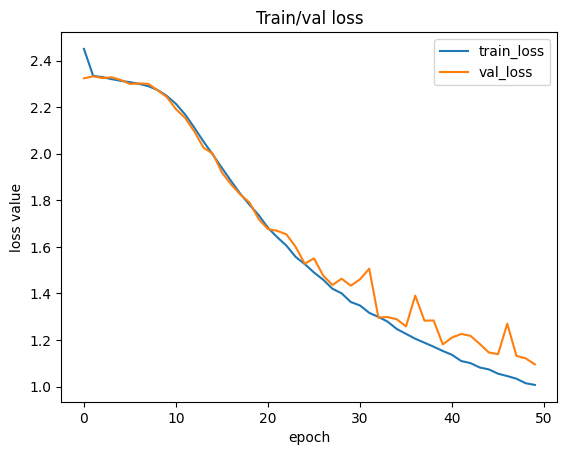

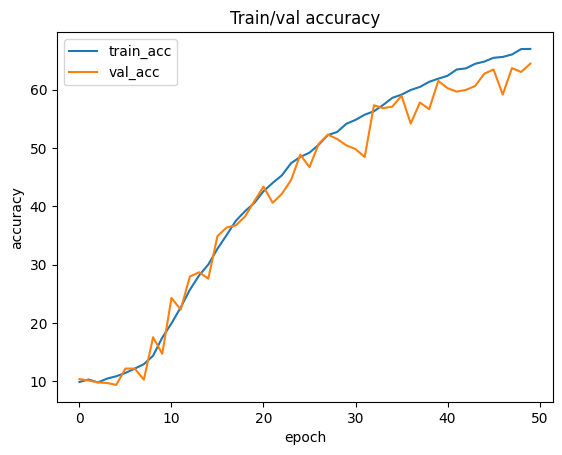

In [47]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [48]:
model = Model2()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 50

train_losses, val_losses, train_acc, val_acc = train(model, trainRight_loader, valRight_loader, optimizer, n_epochs, loss_fn)


Epoch 1/50: train_loss: 2.5358, train_accuracy: 9.8741, val_loss: 2.3465, val_accuracy: 10.2000



Epoch 2/50: train_loss: 2.3169, train_accuracy: 11.8000, val_loss: 2.3167, val_accuracy: 11.3667



Epoch 3/50: train_loss: 2.2913, train_accuracy: 13.8111, val_loss: 2.2683, val_accuracy: 14.8667



Epoch 4/50: train_loss: 2.2379, train_accuracy: 18.4481, val_loss: 2.2143, val_accuracy: 19.5333



Epoch 5/50: train_loss: 2.1434, train_accuracy: 25.8815, val_loss: 2.1046, val_accuracy: 27.9667



Epoch 6/50: train_loss: 2.0128, train_accuracy: 32.7333, val_loss: 1.9770, val_accuracy: 31.9000



Epoch 7/50: train_loss: 1.8654, train_accuracy: 38.8963, val_loss: 1.8262, val_accuracy: 38.8333



Epoch 8/50: train_loss: 1.7266, train_accuracy: 44.1259, val_loss: 1.7190, val_accuracy: 41.7667



Epoch 9/50: train_loss: 1.6043, train_accuracy: 48.1926, val_loss: 1.6074, val_accuracy: 46.3667



Epoch 10/50: train_loss: 1.4948, train_accuracy: 52.1667, val_loss: 1.5486, val_accuracy: 48.5333



Epoch 11/50: train_loss: 1.4013, train_accuracy: 55.3481, val_loss: 1.4530, val_accuracy: 51.1667



Epoch 12/50: train_loss: 1.3188, train_accuracy: 58.1222, val_loss: 1.4018, val_accuracy: 53.4333



Epoch 13/50: train_loss: 1.2472, train_accuracy: 60.5111, val_loss: 1.3570, val_accuracy: 54.8000



Epoch 14/50: train_loss: 1.1840, train_accuracy: 62.2815, val_loss: 1.2984, val_accuracy: 57.2000



Epoch 15/50: train_loss: 1.1277, train_accuracy: 64.4111, val_loss: 1.2920, val_accuracy: 57.3000



Epoch 16/50: train_loss: 1.0756, train_accuracy: 66.1481, val_loss: 1.2460, val_accuracy: 58.5333



Epoch 17/50: train_loss: 1.0312, train_accuracy: 67.6926, val_loss: 1.2130, val_accuracy: 60.0667



Epoch 18/50: train_loss: 0.9887, train_accuracy: 69.2074, val_loss: 1.2008, val_accuracy: 60.1333



Epoch 19/50: train_loss: 0.9496, train_accuracy: 70.5889, val_loss: 1.1759, val_accuracy: 61.9000



Epoch 20/50: train_loss: 0.9151, train_accuracy: 71.4556, val_loss: 1.1628, val_accuracy: 61.7667



Epoch 21/50: train_loss: 0.8812, train_accuracy: 72.8778, val_loss: 1.1526, val_accuracy: 61.9000



Epoch 22/50: train_loss: 0.8486, train_accuracy: 73.9667, val_loss: 1.1379, val_accuracy: 62.8333



Epoch 23/50: train_loss: 0.8193, train_accuracy: 75.1222, val_loss: 1.1450, val_accuracy: 62.4000



Epoch 24/50: train_loss: 0.7903, train_accuracy: 75.8074, val_loss: 1.1197, val_accuracy: 63.5667



Epoch 25/50: train_loss: 0.7639, train_accuracy: 77.0370, val_loss: 1.1239, val_accuracy: 63.5667



Epoch 26/50: train_loss: 0.7379, train_accuracy: 77.7111, val_loss: 1.1015, val_accuracy: 63.8000



Epoch 27/50: train_loss: 0.7138, train_accuracy: 78.8407, val_loss: 1.1079, val_accuracy: 64.3000



Epoch 28/50: train_loss: 0.6896, train_accuracy: 79.5593, val_loss: 1.1151, val_accuracy: 63.9000



Epoch 29/50: train_loss: 0.6670, train_accuracy: 80.4778, val_loss: 1.0922, val_accuracy: 65.1667



Epoch 30/50: train_loss: 0.6454, train_accuracy: 81.0926, val_loss: 1.0971, val_accuracy: 64.6667



Epoch 31/50: train_loss: 0.6243, train_accuracy: 82.0296, val_loss: 1.0906, val_accuracy: 63.9667



Epoch 32/50: train_loss: 0.6061, train_accuracy: 82.4185, val_loss: 1.0957, val_accuracy: 64.9000



Epoch 33/50: train_loss: 0.5853, train_accuracy: 83.1037, val_loss: 1.1041, val_accuracy: 64.6000



Epoch 34/50: train_loss: 0.5662, train_accuracy: 84.1889, val_loss: 1.0935, val_accuracy: 65.4333



Epoch 35/50: train_loss: 0.5483, train_accuracy: 84.6037, val_loss: 1.0996, val_accuracy: 65.3000



Epoch 36/50: train_loss: 0.5304, train_accuracy: 85.3185, val_loss: 1.0929, val_accuracy: 65.6000



Epoch 37/50: train_loss: 0.5119, train_accuracy: 86.0741, val_loss: 1.0976, val_accuracy: 65.9667



Epoch 38/50: train_loss: 0.4962, train_accuracy: 86.4148, val_loss: 1.0975, val_accuracy: 65.3667



Epoch 39/50: train_loss: 0.4812, train_accuracy: 87.1333, val_loss: 1.1045, val_accuracy: 66.0333



Epoch 40/50: train_loss: 0.4639, train_accuracy: 87.7519, val_loss: 1.1108, val_accuracy: 65.7000



Epoch 41/50: train_loss: 0.4490, train_accuracy: 88.3148, val_loss: 1.1290, val_accuracy: 65.6333



Epoch 42/50: train_loss: 0.4341, train_accuracy: 88.6963, val_loss: 1.1154, val_accuracy: 65.8667



Epoch 43/50: train_loss: 0.4207, train_accuracy: 89.2963, val_loss: 1.1106, val_accuracy: 65.9667



Epoch 44/50: train_loss: 0.4065, train_accuracy: 89.5667, val_loss: 1.1199, val_accuracy: 66.3667



Epoch 45/50: train_loss: 0.3921, train_accuracy: 90.3185, val_loss: 1.1163, val_accuracy: 66.0000



Epoch 46/50: train_loss: 0.3783, train_accuracy: 90.9000, val_loss: 1.1327, val_accuracy: 66.2000



Epoch 47/50: train_loss: 0.3661, train_accuracy: 91.3778, val_loss: 1.1282, val_accuracy: 66.2000



Epoch 48/50: train_loss: 0.3540, train_accuracy: 91.7963, val_loss: 1.1304, val_accuracy: 66.3333



Epoch 49/50: train_loss: 0.3435, train_accuracy: 92.1852, val_loss: 1.1649, val_accuracy: 65.6000



Epoch 50/50: train_loss: 0.3297, train_accuracy: 92.5889, val_loss: 1.1475, val_accuracy: 66.3667


In [49]:
# print loss and accuracy of test set
eval_loss, eval_acc = evaluate_model(model, testRight_loader, loss_fn)
print('Loss on test set: {}, Accuracy on test set: {}'.format(eval_loss, eval_acc))


Loss on test set: 1.3539819896221161, Accuracy on test set: 60.12


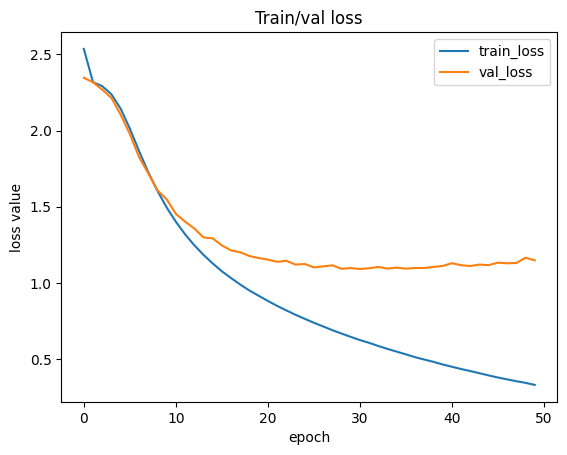

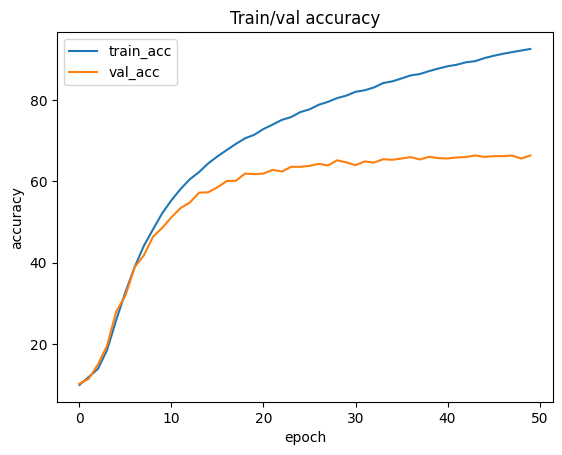

In [50]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [51]:
model = Model3()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 50

train_losses, val_losses, train_acc, val_acc = train(model, trainRight_loader, valRight_loader, optimizer, n_epochs, loss_fn)


Epoch 1/50: train_loss: 2.4210, train_accuracy: 10.1185, val_loss: 2.3223, val_accuracy: 9.4000



Epoch 2/50: train_loss: 2.3210, train_accuracy: 10.0259, val_loss: 2.3196, val_accuracy: 9.7333



Epoch 3/50: train_loss: 2.3190, train_accuracy: 10.1000, val_loss: 2.3175, val_accuracy: 9.7000



Epoch 4/50: train_loss: 2.3169, train_accuracy: 9.9185, val_loss: 2.3168, val_accuracy: 9.9667



Epoch 5/50: train_loss: 2.3180, train_accuracy: 10.0556, val_loss: 2.3136, val_accuracy: 10.4667



Epoch 6/50: train_loss: 2.3156, train_accuracy: 9.9519, val_loss: 2.3185, val_accuracy: 10.2333



Epoch 7/50: train_loss: 2.3149, train_accuracy: 10.4111, val_loss: 2.3269, val_accuracy: 9.8000



Epoch 8/50: train_loss: 2.3157, train_accuracy: 10.0407, val_loss: 2.3187, val_accuracy: 9.4000



Epoch 9/50: train_loss: 2.3140, train_accuracy: 10.1444, val_loss: 2.3184, val_accuracy: 9.4000



Epoch 10/50: train_loss: 2.3138, train_accuracy: 10.1111, val_loss: 2.3110, val_accuracy: 10.5333



Epoch 11/50: train_loss: 2.3135, train_accuracy: 10.3111, val_loss: 2.3081, val_accuracy: 10.3333



Epoch 12/50: train_loss: 2.3123, train_accuracy: 10.3074, val_loss: 2.3176, val_accuracy: 10.3333



Epoch 13/50: train_loss: 2.3115, train_accuracy: 10.3296, val_loss: 2.3130, val_accuracy: 9.8000



Epoch 14/50: train_loss: 2.3125, train_accuracy: 10.4519, val_loss: 2.3099, val_accuracy: 10.1667



Epoch 15/50: train_loss: 2.3103, train_accuracy: 10.8815, val_loss: 2.3101, val_accuracy: 11.6333



Epoch 16/50: train_loss: 2.3123, train_accuracy: 10.2333, val_loss: 2.3119, val_accuracy: 9.8333



Epoch 17/50: train_loss: 2.3106, train_accuracy: 10.3889, val_loss: 2.3089, val_accuracy: 11.0667



Epoch 18/50: train_loss: 2.3109, train_accuracy: 9.9593, val_loss: 2.3088, val_accuracy: 9.8333



Epoch 19/50: train_loss: 2.3098, train_accuracy: 10.2111, val_loss: 2.3096, val_accuracy: 10.4333



Epoch 20/50: train_loss: 2.3097, train_accuracy: 10.5296, val_loss: 2.3079, val_accuracy: 9.9000



Epoch 21/50: train_loss: 2.3093, train_accuracy: 10.4444, val_loss: 2.3063, val_accuracy: 10.9333



Epoch 22/50: train_loss: 2.3090, train_accuracy: 10.4741, val_loss: 2.3125, val_accuracy: 9.8667



Epoch 23/50: train_loss: 2.3087, train_accuracy: 10.6519, val_loss: 2.3050, val_accuracy: 10.4333



Epoch 24/50: train_loss: 2.3077, train_accuracy: 10.7407, val_loss: 2.3073, val_accuracy: 9.9667



Epoch 25/50: train_loss: 2.3069, train_accuracy: 10.7852, val_loss: 2.3048, val_accuracy: 11.6000



Epoch 26/50: train_loss: 2.3058, train_accuracy: 11.0519, val_loss: 2.3128, val_accuracy: 9.4000



Epoch 27/50: train_loss: 2.3070, train_accuracy: 10.6889, val_loss: 2.3119, val_accuracy: 10.9667



Epoch 28/50: train_loss: 2.3070, train_accuracy: 10.3815, val_loss: 2.3052, val_accuracy: 12.2000



Epoch 29/50: train_loss: 2.3057, train_accuracy: 10.8852, val_loss: 2.3069, val_accuracy: 10.4667



Epoch 30/50: train_loss: 2.3058, train_accuracy: 10.9333, val_loss: 2.3071, val_accuracy: 10.4000



Epoch 31/50: train_loss: 2.3055, train_accuracy: 11.0630, val_loss: 2.3087, val_accuracy: 10.2667



Epoch 32/50: train_loss: 2.3048, train_accuracy: 11.0481, val_loss: 2.3062, val_accuracy: 10.9000



Epoch 33/50: train_loss: 2.3047, train_accuracy: 11.5519, val_loss: 2.3100, val_accuracy: 10.4667



Epoch 34/50: train_loss: 2.3050, train_accuracy: 10.8148, val_loss: 2.3098, val_accuracy: 9.3667



Epoch 35/50: train_loss: 2.3036, train_accuracy: 11.4444, val_loss: 2.3096, val_accuracy: 10.7000



Epoch 36/50: train_loss: 2.3039, train_accuracy: 11.0630, val_loss: 2.3063, val_accuracy: 11.3667



Epoch 37/50: train_loss: 2.3042, train_accuracy: 11.2296, val_loss: 2.3108, val_accuracy: 11.3333



Epoch 38/50: train_loss: 2.3022, train_accuracy: 11.3037, val_loss: 2.3104, val_accuracy: 9.7000



Epoch 39/50: train_loss: 2.3031, train_accuracy: 11.4593, val_loss: 2.3059, val_accuracy: 10.8000



Epoch 40/50: train_loss: 2.3026, train_accuracy: 11.5593, val_loss: 2.3108, val_accuracy: 10.7333



Epoch 41/50: train_loss: 2.3035, train_accuracy: 11.5630, val_loss: 2.3085, val_accuracy: 9.1333



Epoch 42/50: train_loss: 2.3022, train_accuracy: 11.6852, val_loss: 2.3079, val_accuracy: 12.0000



Epoch 43/50: train_loss: 2.3014, train_accuracy: 11.6000, val_loss: 2.3140, val_accuracy: 9.7333



Epoch 44/50: train_loss: 2.3015, train_accuracy: 11.8370, val_loss: 2.3062, val_accuracy: 11.7667



Epoch 45/50: train_loss: 2.3013, train_accuracy: 11.7185, val_loss: 2.3058, val_accuracy: 9.5667



Epoch 46/50: train_loss: 2.3017, train_accuracy: 12.0111, val_loss: 2.3157, val_accuracy: 10.2000



Epoch 47/50: train_loss: 2.3010, train_accuracy: 11.9407, val_loss: 2.3054, val_accuracy: 8.5000



Epoch 48/50: train_loss: 2.3004, train_accuracy: 12.0074, val_loss: 2.3105, val_accuracy: 9.6667



Epoch 49/50: train_loss: 2.3003, train_accuracy: 11.6852, val_loss: 2.3165, val_accuracy: 10.3000



Epoch 50/50: train_loss: 2.3003, train_accuracy: 11.8741, val_loss: 2.3047, val_accuracy: 12.5333


In [52]:
# print loss and accuracy of test set
eval_loss, eval_acc = evaluate_model(model, testRight_loader, loss_fn)
print('Loss on test set: {}, Accuracy on test set: {}'.format(eval_loss, eval_acc))


Loss on test set: 2.304597866535187, Accuracy on test set: 11.98


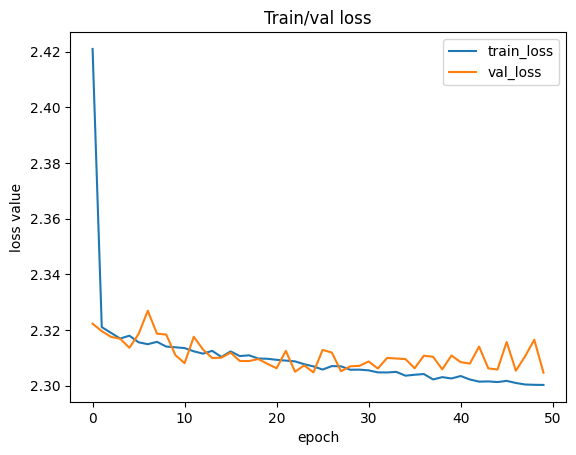

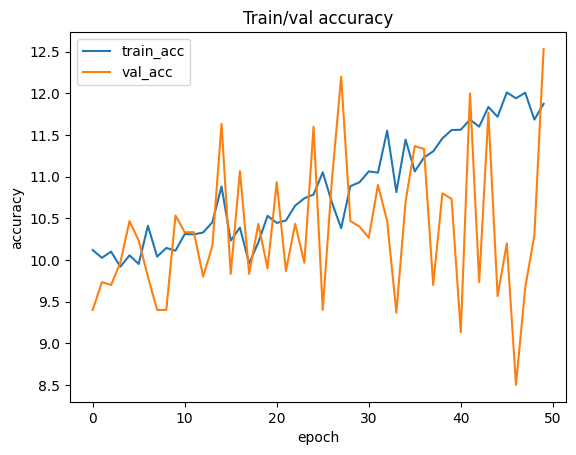

In [53]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

## Task 4. Train on concatenated training set.

Train the models on concatenated training set and select the best model on the validation set.

In [54]:
# Initialize loss function, optimizer and parameters
model = Model1()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 50

train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, loss_fn)


Epoch 1/50: train_loss: 2.3909, train_accuracy: 9.9963, val_loss: 2.3215, val_accuracy: 10.0667



Epoch 2/50: train_loss: 2.3224, train_accuracy: 10.5444, val_loss: 2.3090, val_accuracy: 10.5667



Epoch 3/50: train_loss: 2.3104, train_accuracy: 11.1019, val_loss: 2.3169, val_accuracy: 10.2833



Epoch 4/50: train_loss: 2.2897, train_accuracy: 13.0944, val_loss: 2.2722, val_accuracy: 18.8833



Epoch 5/50: train_loss: 2.2513, train_accuracy: 16.3426, val_loss: 2.2266, val_accuracy: 18.9333



Epoch 6/50: train_loss: 2.1873, train_accuracy: 20.8019, val_loss: 2.1780, val_accuracy: 20.8000



Epoch 7/50: train_loss: 2.1096, train_accuracy: 25.2241, val_loss: 2.0758, val_accuracy: 25.2167



Epoch 8/50: train_loss: 2.0138, train_accuracy: 30.3389, val_loss: 1.9758, val_accuracy: 31.0333



Epoch 9/50: train_loss: 1.9113, train_accuracy: 34.6963, val_loss: 1.8457, val_accuracy: 37.1000



Epoch 10/50: train_loss: 1.8105, train_accuracy: 38.7111, val_loss: 1.7778, val_accuracy: 40.0000



Epoch 11/50: train_loss: 1.7099, train_accuracy: 42.3722, val_loss: 1.7057, val_accuracy: 40.7000



Epoch 12/50: train_loss: 1.6306, train_accuracy: 44.8704, val_loss: 1.5938, val_accuracy: 44.2833



Epoch 13/50: train_loss: 1.5489, train_accuracy: 47.8111, val_loss: 1.5272, val_accuracy: 48.1000



Epoch 14/50: train_loss: 1.4814, train_accuracy: 49.8759, val_loss: 1.3969, val_accuracy: 53.5167



Epoch 15/50: train_loss: 1.4232, train_accuracy: 51.8130, val_loss: 1.4743, val_accuracy: 49.3167



Epoch 16/50: train_loss: 1.3706, train_accuracy: 53.7389, val_loss: 1.3133, val_accuracy: 55.7167



Epoch 17/50: train_loss: 1.3327, train_accuracy: 54.7944, val_loss: 1.3333, val_accuracy: 53.7000



Epoch 18/50: train_loss: 1.2929, train_accuracy: 56.7370, val_loss: 1.2493, val_accuracy: 57.2167



Epoch 19/50: train_loss: 1.2574, train_accuracy: 57.5722, val_loss: 1.2156, val_accuracy: 58.1833



Epoch 20/50: train_loss: 1.2232, train_accuracy: 59.0037, val_loss: 1.2557, val_accuracy: 56.7667



Epoch 21/50: train_loss: 1.1893, train_accuracy: 60.1407, val_loss: 1.2973, val_accuracy: 55.4333



Epoch 22/50: train_loss: 1.1585, train_accuracy: 61.1370, val_loss: 1.2484, val_accuracy: 56.9500



Epoch 23/50: train_loss: 1.1298, train_accuracy: 62.2981, val_loss: 1.1887, val_accuracy: 59.5000



Epoch 24/50: train_loss: 1.1109, train_accuracy: 62.9148, val_loss: 1.1777, val_accuracy: 59.9000



Epoch 25/50: train_loss: 1.0885, train_accuracy: 63.9278, val_loss: 1.1130, val_accuracy: 62.6333



Epoch 26/50: train_loss: 1.0691, train_accuracy: 64.6889, val_loss: 1.0825, val_accuracy: 63.8000



Epoch 27/50: train_loss: 1.0519, train_accuracy: 65.4019, val_loss: 1.0887, val_accuracy: 63.2333



Epoch 28/50: train_loss: 1.0257, train_accuracy: 66.1870, val_loss: 1.0807, val_accuracy: 64.1333



Epoch 29/50: train_loss: 1.0175, train_accuracy: 66.5296, val_loss: 1.1181, val_accuracy: 61.5333



Epoch 30/50: train_loss: 0.9913, train_accuracy: 67.4537, val_loss: 1.0112, val_accuracy: 66.5667



Epoch 31/50: train_loss: 0.9756, train_accuracy: 67.9741, val_loss: 1.0248, val_accuracy: 66.1167



Epoch 32/50: train_loss: 0.9609, train_accuracy: 68.7926, val_loss: 1.0122, val_accuracy: 67.2333



Epoch 33/50: train_loss: 0.9450, train_accuracy: 69.3370, val_loss: 1.0333, val_accuracy: 65.9500



Epoch 34/50: train_loss: 0.9297, train_accuracy: 69.9111, val_loss: 1.0258, val_accuracy: 65.9333



Epoch 35/50: train_loss: 0.9186, train_accuracy: 70.1741, val_loss: 1.0332, val_accuracy: 65.9833



Epoch 36/50: train_loss: 0.9007, train_accuracy: 70.8407, val_loss: 0.9687, val_accuracy: 69.1333



Epoch 37/50: train_loss: 0.8966, train_accuracy: 71.0481, val_loss: 1.0547, val_accuracy: 65.9667



Epoch 38/50: train_loss: 0.8802, train_accuracy: 71.5556, val_loss: 1.0547, val_accuracy: 65.1667



Epoch 39/50: train_loss: 0.8681, train_accuracy: 71.9167, val_loss: 0.9960, val_accuracy: 67.7667



Epoch 40/50: train_loss: 0.8563, train_accuracy: 72.5778, val_loss: 0.9293, val_accuracy: 70.0833



Epoch 41/50: train_loss: 0.8485, train_accuracy: 72.7648, val_loss: 0.9703, val_accuracy: 68.7667



Epoch 42/50: train_loss: 0.8367, train_accuracy: 73.1926, val_loss: 0.9844, val_accuracy: 68.3667



Epoch 43/50: train_loss: 0.8350, train_accuracy: 73.1296, val_loss: 0.9714, val_accuracy: 69.3000



Epoch 44/50: train_loss: 0.8172, train_accuracy: 73.7185, val_loss: 0.9551, val_accuracy: 69.0833



Epoch 45/50: train_loss: 0.8106, train_accuracy: 74.0185, val_loss: 0.9105, val_accuracy: 70.6833



Epoch 46/50: train_loss: 0.8040, train_accuracy: 74.1333, val_loss: 0.9472, val_accuracy: 69.9667



Epoch 47/50: train_loss: 0.7938, train_accuracy: 74.6389, val_loss: 0.9231, val_accuracy: 71.3167



Epoch 48/50: train_loss: 0.7830, train_accuracy: 74.9481, val_loss: 0.9356, val_accuracy: 69.5167



Epoch 49/50: train_loss: 0.7708, train_accuracy: 75.3370, val_loss: 0.9404, val_accuracy: 70.0167



Epoch 50/50: train_loss: 0.7702, train_accuracy: 75.4593, val_loss: 0.9017, val_accuracy: 70.8500


In [55]:
# print loss and accuracy of test set
eval_loss, eval_acc = evaluate_model(model, test_loader, loss_fn)
print('Loss on test set: {}, Accuracy on test set: {}'.format(eval_loss, eval_acc))


Loss on test set: 1.0917822567722466, Accuracy on test set: 64.7


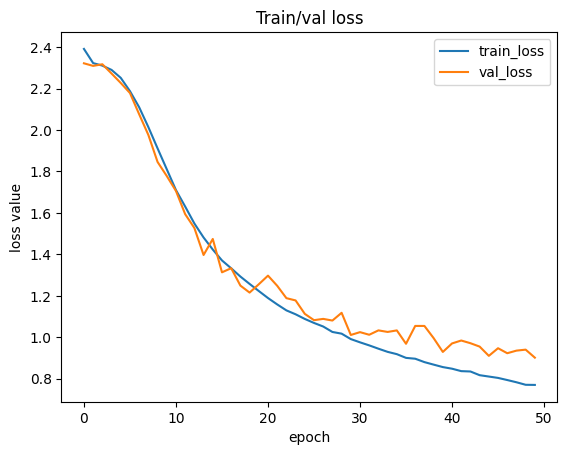

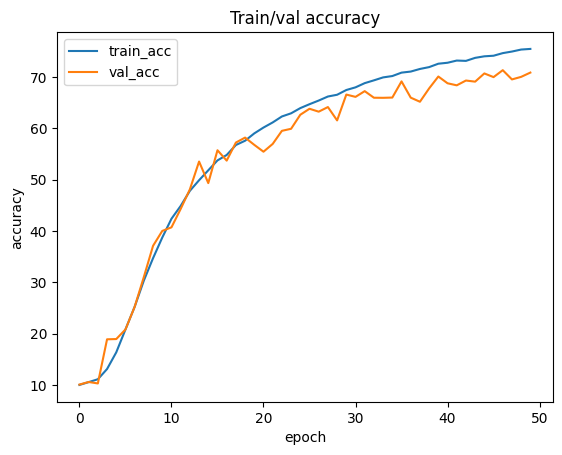

In [56]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [57]:
model = Model2()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 50

train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, loss_fn)


Epoch 1/50: train_loss: 2.4284, train_accuracy: 10.8704, val_loss: 2.3441, val_accuracy: 11.7167



Epoch 2/50: train_loss: 2.2786, train_accuracy: 15.1944, val_loss: 2.2152, val_accuracy: 21.6667



Epoch 3/50: train_loss: 2.1221, train_accuracy: 25.6741, val_loss: 2.0015, val_accuracy: 31.2500



Epoch 4/50: train_loss: 1.8734, train_accuracy: 37.5167, val_loss: 1.7590, val_accuracy: 41.0667



Epoch 5/50: train_loss: 1.6494, train_accuracy: 45.9722, val_loss: 1.5591, val_accuracy: 48.6500



Epoch 6/50: train_loss: 1.4706, train_accuracy: 52.3037, val_loss: 1.4222, val_accuracy: 53.0333



Epoch 7/50: train_loss: 1.3337, train_accuracy: 56.9426, val_loss: 1.3225, val_accuracy: 56.6333



Epoch 8/50: train_loss: 1.2273, train_accuracy: 60.6241, val_loss: 1.2549, val_accuracy: 58.2667



Epoch 9/50: train_loss: 1.1410, train_accuracy: 63.5259, val_loss: 1.1820, val_accuracy: 61.0500



Epoch 10/50: train_loss: 1.0693, train_accuracy: 66.0426, val_loss: 1.1170, val_accuracy: 63.3000



Epoch 11/50: train_loss: 1.0088, train_accuracy: 68.0796, val_loss: 1.0780, val_accuracy: 64.9333



Epoch 12/50: train_loss: 0.9557, train_accuracy: 70.0611, val_loss: 1.0749, val_accuracy: 64.4333



Epoch 13/50: train_loss: 0.9090, train_accuracy: 71.5593, val_loss: 1.0330, val_accuracy: 66.0333



Epoch 14/50: train_loss: 0.8677, train_accuracy: 72.9907, val_loss: 1.0065, val_accuracy: 67.6167



Epoch 15/50: train_loss: 0.8309, train_accuracy: 74.3463, val_loss: 0.9973, val_accuracy: 67.3833



Epoch 16/50: train_loss: 0.7973, train_accuracy: 75.3463, val_loss: 0.9747, val_accuracy: 68.5333



Epoch 17/50: train_loss: 0.7673, train_accuracy: 76.3685, val_loss: 0.9718, val_accuracy: 68.5333



Epoch 18/50: train_loss: 0.7401, train_accuracy: 77.4000, val_loss: 0.9526, val_accuracy: 69.3333



Epoch 19/50: train_loss: 0.7142, train_accuracy: 78.2148, val_loss: 0.9513, val_accuracy: 69.3167



Epoch 20/50: train_loss: 0.6893, train_accuracy: 79.0870, val_loss: 0.9543, val_accuracy: 69.4833



Epoch 21/50: train_loss: 0.6672, train_accuracy: 79.7537, val_loss: 0.9260, val_accuracy: 70.5167



Epoch 22/50: train_loss: 0.6453, train_accuracy: 80.5333, val_loss: 0.9449, val_accuracy: 69.8333



Epoch 23/50: train_loss: 0.6251, train_accuracy: 81.0722, val_loss: 0.9291, val_accuracy: 70.6167



Epoch 24/50: train_loss: 0.6061, train_accuracy: 81.9574, val_loss: 0.9408, val_accuracy: 70.6000



Epoch 25/50: train_loss: 0.5880, train_accuracy: 82.3389, val_loss: 0.9402, val_accuracy: 70.2667



Epoch 26/50: train_loss: 0.5699, train_accuracy: 82.9222, val_loss: 0.9368, val_accuracy: 70.8000



Epoch 27/50: train_loss: 0.5529, train_accuracy: 83.6259, val_loss: 0.9273, val_accuracy: 70.9667



Epoch 28/50: train_loss: 0.5370, train_accuracy: 84.1704, val_loss: 0.9303, val_accuracy: 70.9667



Epoch 29/50: train_loss: 0.5225, train_accuracy: 84.6296, val_loss: 0.9346, val_accuracy: 71.1333



Epoch 30/50: train_loss: 0.5058, train_accuracy: 85.0389, val_loss: 0.9550, val_accuracy: 70.5500



Epoch 31/50: train_loss: 0.4920, train_accuracy: 85.5944, val_loss: 0.9321, val_accuracy: 71.2500



Epoch 32/50: train_loss: 0.4792, train_accuracy: 85.9500, val_loss: 0.9503, val_accuracy: 70.7000



Epoch 33/50: train_loss: 0.4658, train_accuracy: 86.3389, val_loss: 0.9494, val_accuracy: 70.9333



Epoch 34/50: train_loss: 0.4524, train_accuracy: 86.8685, val_loss: 0.9381, val_accuracy: 71.3000



Epoch 35/50: train_loss: 0.4383, train_accuracy: 87.4259, val_loss: 0.9367, val_accuracy: 71.3167



Epoch 36/50: train_loss: 0.4256, train_accuracy: 87.7426, val_loss: 0.9367, val_accuracy: 71.4167



Epoch 37/50: train_loss: 0.4140, train_accuracy: 88.3000, val_loss: 0.9407, val_accuracy: 71.2167



Epoch 38/50: train_loss: 0.4026, train_accuracy: 88.5685, val_loss: 0.9452, val_accuracy: 71.2833



Epoch 39/50: train_loss: 0.3907, train_accuracy: 89.0630, val_loss: 0.9564, val_accuracy: 71.4167



Epoch 40/50: train_loss: 0.3802, train_accuracy: 89.5185, val_loss: 0.9685, val_accuracy: 71.2167



Epoch 41/50: train_loss: 0.3697, train_accuracy: 89.8315, val_loss: 0.9644, val_accuracy: 71.7167



Epoch 42/50: train_loss: 0.3601, train_accuracy: 90.1815, val_loss: 0.9710, val_accuracy: 71.4167



Epoch 43/50: train_loss: 0.3485, train_accuracy: 90.5685, val_loss: 0.9732, val_accuracy: 71.5667



Epoch 44/50: train_loss: 0.3374, train_accuracy: 91.0111, val_loss: 0.9760, val_accuracy: 71.3667



Epoch 45/50: train_loss: 0.3280, train_accuracy: 91.4556, val_loss: 0.9904, val_accuracy: 70.8167



Epoch 46/50: train_loss: 0.3199, train_accuracy: 91.5796, val_loss: 0.9872, val_accuracy: 70.8833



Epoch 47/50: train_loss: 0.3086, train_accuracy: 92.0000, val_loss: 0.9943, val_accuracy: 71.2833



Epoch 48/50: train_loss: 0.3007, train_accuracy: 92.4741, val_loss: 1.0316, val_accuracy: 70.1500



Epoch 49/50: train_loss: 0.2923, train_accuracy: 92.6370, val_loss: 1.0108, val_accuracy: 71.1833



Epoch 50/50: train_loss: 0.2829, train_accuracy: 92.9352, val_loss: 1.0298, val_accuracy: 70.8333


In [58]:
# print loss and accuracy of test set
eval_loss, eval_acc = evaluate_model(model, test_loader, loss_fn)
print('Loss on test set: {}, Accuracy on test set: {}'.format(eval_loss, eval_acc))


Loss on test set: 1.2561704546590395, Accuracy on test set: 64.24


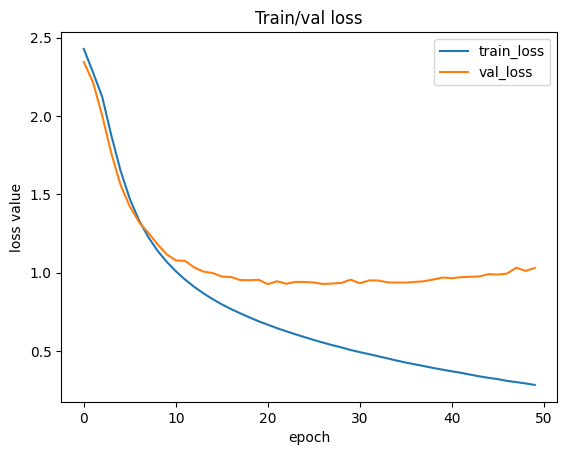

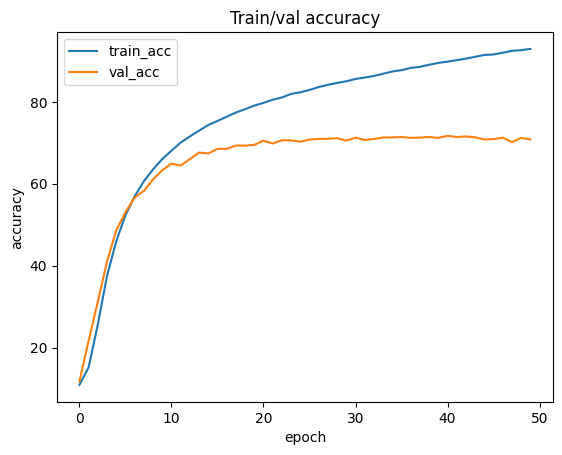

In [59]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

In [60]:
model = Model3()
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 50

train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, optimizer, n_epochs, loss_fn)


Epoch 1/50: train_loss: 2.3700, train_accuracy: 9.9889, val_loss: 2.3246, val_accuracy: 10.4167



Epoch 2/50: train_loss: 2.3170, train_accuracy: 10.3167, val_loss: 2.3170, val_accuracy: 10.4833



Epoch 3/50: train_loss: 2.3162, train_accuracy: 9.8778, val_loss: 2.3268, val_accuracy: 10.4500



Epoch 4/50: train_loss: 2.3155, train_accuracy: 10.2093, val_loss: 2.3115, val_accuracy: 11.1833



Epoch 5/50: train_loss: 2.3140, train_accuracy: 10.1204, val_loss: 2.3140, val_accuracy: 10.0667



Epoch 6/50: train_loss: 2.3134, train_accuracy: 10.0222, val_loss: 2.3064, val_accuracy: 10.2500



Epoch 7/50: train_loss: 2.3122, train_accuracy: 10.4481, val_loss: 2.3081, val_accuracy: 9.7667



Epoch 8/50: train_loss: 2.3115, train_accuracy: 10.1889, val_loss: 2.3145, val_accuracy: 10.1833



Epoch 9/50: train_loss: 2.3111, train_accuracy: 10.5630, val_loss: 2.3178, val_accuracy: 9.6833



Epoch 10/50: train_loss: 2.3098, train_accuracy: 10.3778, val_loss: 2.3083, val_accuracy: 10.8833



Epoch 11/50: train_loss: 2.3100, train_accuracy: 10.3389, val_loss: 2.3114, val_accuracy: 12.3333



Epoch 12/50: train_loss: 2.3088, train_accuracy: 10.4241, val_loss: 2.3128, val_accuracy: 10.0167



Epoch 13/50: train_loss: 2.3092, train_accuracy: 10.4759, val_loss: 2.3091, val_accuracy: 9.3167



Epoch 14/50: train_loss: 2.3081, train_accuracy: 10.5722, val_loss: 2.3131, val_accuracy: 10.7833



Epoch 15/50: train_loss: 2.3074, train_accuracy: 10.6426, val_loss: 2.3104, val_accuracy: 9.8833



Epoch 16/50: train_loss: 2.3075, train_accuracy: 10.8093, val_loss: 2.3063, val_accuracy: 11.4000



Epoch 17/50: train_loss: 2.3067, train_accuracy: 10.7407, val_loss: 2.3053, val_accuracy: 11.8333



Epoch 18/50: train_loss: 2.3061, train_accuracy: 11.0019, val_loss: 2.3141, val_accuracy: 11.2667



Epoch 19/50: train_loss: 2.3060, train_accuracy: 10.8463, val_loss: 2.3109, val_accuracy: 10.3833



Epoch 20/50: train_loss: 2.3056, train_accuracy: 10.8963, val_loss: 2.3099, val_accuracy: 11.1167



Epoch 21/50: train_loss: 2.3046, train_accuracy: 11.2037, val_loss: 2.3065, val_accuracy: 11.5167



Epoch 22/50: train_loss: 2.3048, train_accuracy: 11.1315, val_loss: 2.3030, val_accuracy: 11.1000



Epoch 23/50: train_loss: 2.3047, train_accuracy: 11.2296, val_loss: 2.3052, val_accuracy: 12.0167



Epoch 24/50: train_loss: 2.3044, train_accuracy: 11.2556, val_loss: 2.3052, val_accuracy: 10.0000



Epoch 25/50: train_loss: 2.3039, train_accuracy: 11.2593, val_loss: 2.3086, val_accuracy: 11.1833



Epoch 26/50: train_loss: 2.3044, train_accuracy: 11.2593, val_loss: 2.3050, val_accuracy: 8.8167



Epoch 27/50: train_loss: 2.3035, train_accuracy: 11.3352, val_loss: 2.3073, val_accuracy: 9.4000



Epoch 28/50: train_loss: 2.3033, train_accuracy: 11.4074, val_loss: 2.3056, val_accuracy: 10.7500



Epoch 29/50: train_loss: 2.3029, train_accuracy: 11.3537, val_loss: 2.3040, val_accuracy: 11.5500



Epoch 30/50: train_loss: 2.3022, train_accuracy: 11.7889, val_loss: 2.3134, val_accuracy: 10.8833



Epoch 31/50: train_loss: 2.3020, train_accuracy: 11.4741, val_loss: 2.3045, val_accuracy: 11.6667



Epoch 32/50: train_loss: 2.3019, train_accuracy: 11.6333, val_loss: 2.3064, val_accuracy: 11.9000



Epoch 33/50: train_loss: 2.3013, train_accuracy: 11.7852, val_loss: 2.3063, val_accuracy: 9.6833



Epoch 34/50: train_loss: 2.3016, train_accuracy: 11.6778, val_loss: 2.3067, val_accuracy: 11.5500



Epoch 35/50: train_loss: 2.3007, train_accuracy: 11.7000, val_loss: 2.3046, val_accuracy: 12.6333



Epoch 36/50: train_loss: 2.3008, train_accuracy: 11.8426, val_loss: 2.3069, val_accuracy: 9.8000



Epoch 37/50: train_loss: 2.3005, train_accuracy: 11.9704, val_loss: 2.3080, val_accuracy: 8.6667



Epoch 38/50: train_loss: 2.2997, train_accuracy: 11.9093, val_loss: 2.3089, val_accuracy: 10.0167



Epoch 39/50: train_loss: 2.2998, train_accuracy: 11.8574, val_loss: 2.3033, val_accuracy: 10.1333



Epoch 40/50: train_loss: 2.3001, train_accuracy: 12.1444, val_loss: 2.3094, val_accuracy: 13.0333



Epoch 41/50: train_loss: 2.2993, train_accuracy: 11.8444, val_loss: 2.3081, val_accuracy: 10.8500



Epoch 42/50: train_loss: 2.2992, train_accuracy: 12.3296, val_loss: 2.3037, val_accuracy: 10.6333



Epoch 43/50: train_loss: 2.2992, train_accuracy: 11.9130, val_loss: 2.3112, val_accuracy: 10.0500



Epoch 44/50: train_loss: 2.2983, train_accuracy: 12.0315, val_loss: 2.3069, val_accuracy: 10.3000



Epoch 45/50: train_loss: 2.2980, train_accuracy: 12.2556, val_loss: 2.3045, val_accuracy: 12.4167



Epoch 46/50: train_loss: 2.2984, train_accuracy: 12.0259, val_loss: 2.3090, val_accuracy: 9.8000



Epoch 47/50: train_loss: 2.2983, train_accuracy: 12.0963, val_loss: 2.3077, val_accuracy: 11.5167



Epoch 48/50: train_loss: 2.2978, train_accuracy: 12.3019, val_loss: 2.3069, val_accuracy: 12.6333



Epoch 49/50: train_loss: 2.2974, train_accuracy: 12.1926, val_loss: 2.3054, val_accuracy: 12.5167



Epoch 50/50: train_loss: 2.2970, train_accuracy: 12.5685, val_loss: 2.3067, val_accuracy: 11.8500


In [61]:
# print loss and accuracy of test set
eval_loss, eval_acc = evaluate_model(model, test_loader, loss_fn)
print('Loss on test set: {}, Accuracy on test set: {}'.format(eval_loss, eval_acc))


Loss on test set: 2.3095815242091313, Accuracy on test set: 11.75


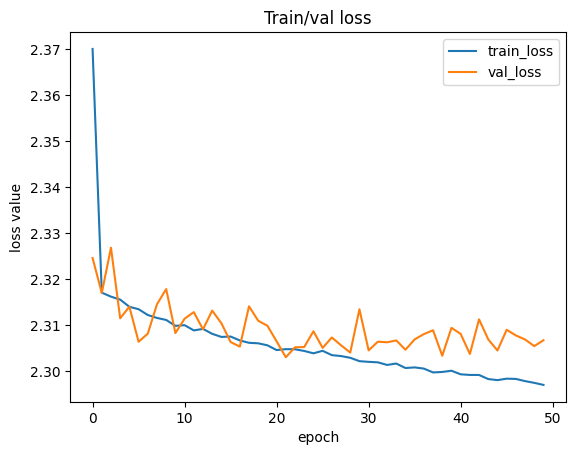

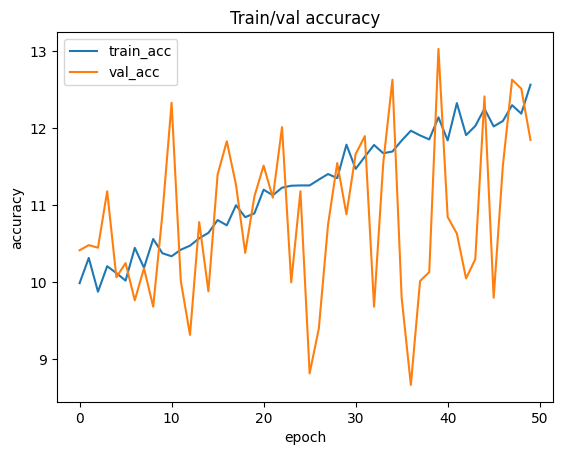

In [62]:
plot(n_epochs, train_losses, val_losses, train_acc, val_acc)

##  Task 5. Evaluation

From the previously selected models select the one that shows the best results on the validation set. Let's denote this as the best model. How can you explain the differences in the accuracies of the models trained on different training sets?


So I have tried three different models with the following layers:

* Model1
 * sigmoid
 * Linear
 * ReLU
 * Linear
 * Softmax

* Model2
 * ReLU
 * Linear
 * ReLU
 * Linear
 * Softmax

* Model3
 * sigmoid
 * Linear
 * sigmoid
 * Linear
 * Softmax

And in both runs, right dataset only and concatenated dataset, model2 performed by far the best. This could be because the benefit of ReLU is that the derivative is either 0 or 1, so multiplying by it won't cause weights that are further away from the end result of the loss function to suffer from the vanishing gradient problem. The vanishing gradient problem leads to very small changes in the weights proportional to the partial derifative of the error function. The gradient is multiplied n times in back propagation to get the gradients of lower layers. The effect of multiplying the gradient n times makes the gradient to be even smaller for lower layers, leading to a very small change or even no change in the weights of lower layers. Therefore, the deeper the network, the more the effect of vanishing gradients. This makes learning per iteration slower when activation functions that suffer from vanishing gradients is used e.g Sigmoid and tanh functions.

Report the accuracy of the best model on the test set.

The best accuracy is from model2. The accuracy is **70%**

## Task 6. Visualizations

Visualize some examples of the best model's successful and failure predictions on the test set. Visualize the accuaracy depending on the digit pairs. Why is the model better or worse on some digits? 